In [66]:
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
blobs = make_blobs(n_samples=10000, n_features=12, centers=5, random_state=42)

In [74]:
X = blobs[0]
y= blobs[1]

In [75]:
feature_names = ['feature_'+str(i) for i in range(X.shape[1])]
# feature_names

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11']

In [76]:
blobs_df = pd.DataFrame(X, columns = feature_names)
blobs_df['class'] = y

In [77]:
# blobs_df.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -3.308097  10.042765   4.793072   3.355552  -7.546183  -6.005940   
1  -2.631670   6.279506  -7.004843   2.096295   2.013659 -10.572718   
2  -0.901773  -7.155479   8.131075   6.349464   9.289674   9.061868   
3  -2.123448   9.716946   4.880756   1.307476  -6.510611  -6.755824   
4  -0.176162   9.418227   4.498637   1.116668  -7.623871  -7.705879   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  class  
0  -5.998705   7.679555   2.883949   4.854969  -11.010385    9.984014      0  
1   2.817830  -6.556240  -8.407987   8.480144    8.381395    4.706676      2  
2   2.911258   7.900673  -8.377520  -6.457455   -7.650445   -2.955146      4  
3  -7.902272   8.100460   2.052777   3.264199  -10.241260    8.848408      0  
4  -7.467229   7.341493   2.587547   5.675699  -11.946774   10.677071      0

In [78]:
# blobs_df['class'].value_counts()

4    2000
3    2000
2    2000
1    2000
0    2000
Name: class, dtype: int64

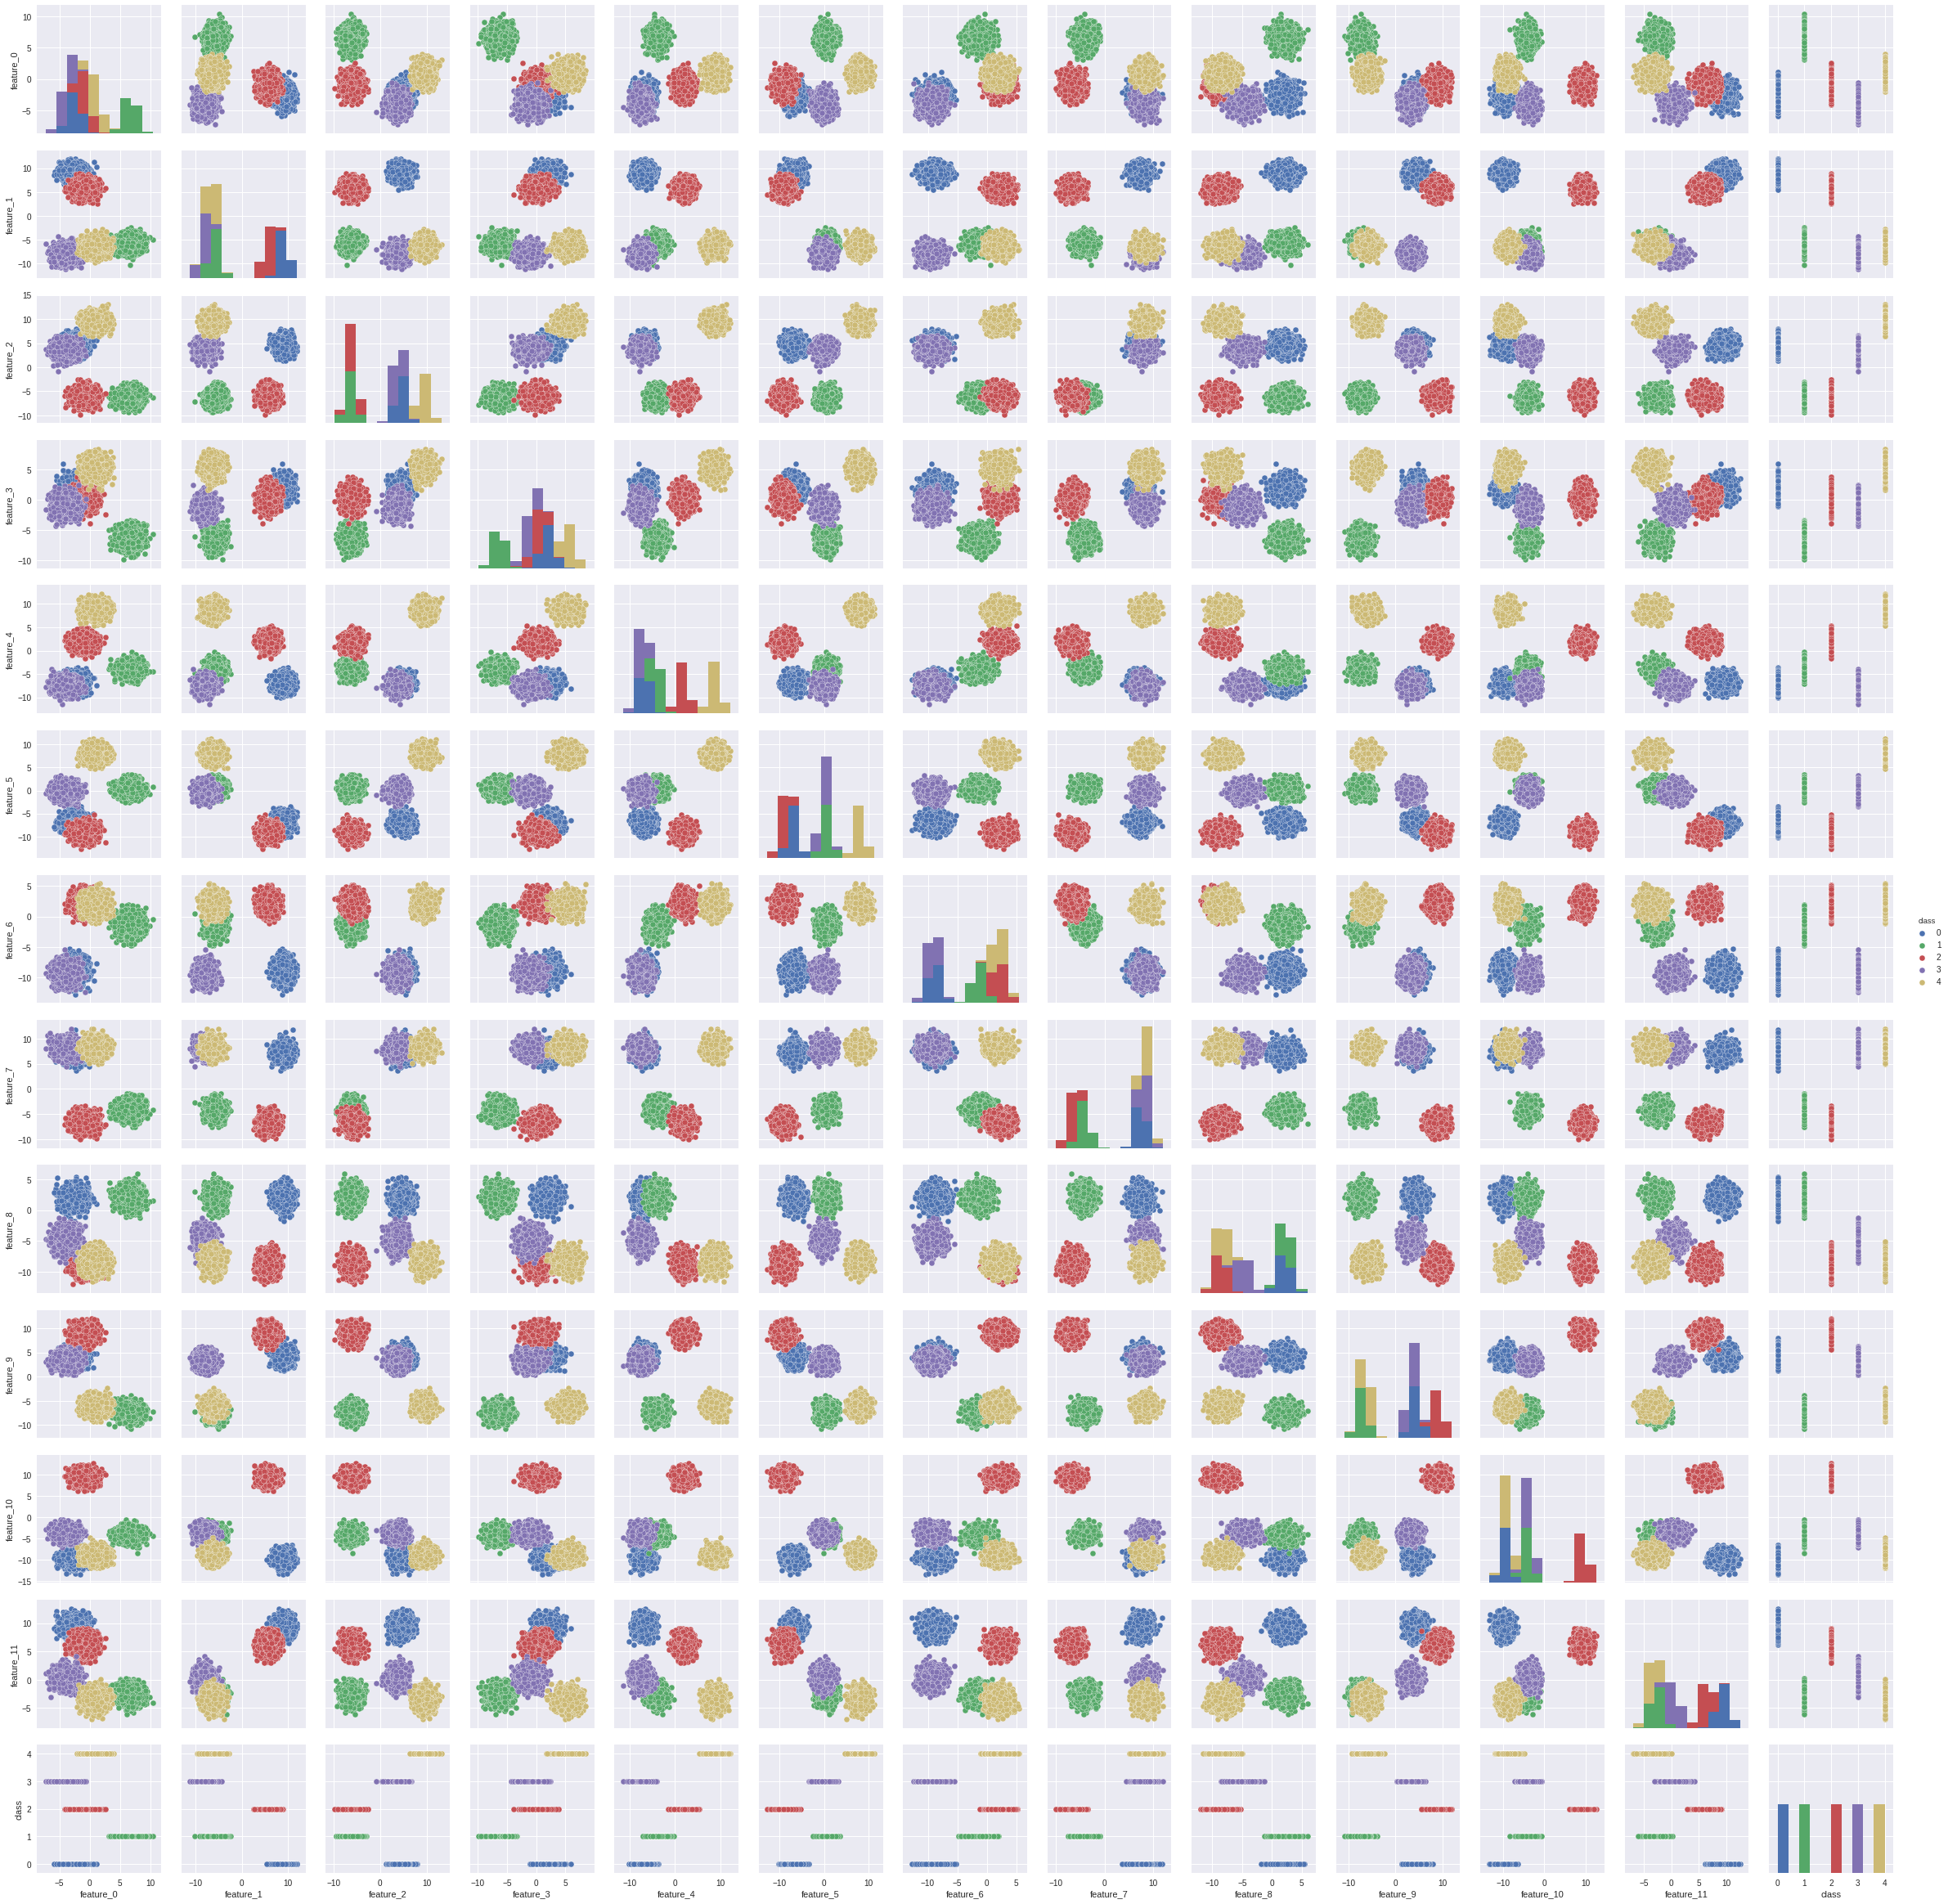

In [79]:
sns.pairplot(blobs_df, hue='class')

In [111]:
class KMeansScratch:
    def __init__(self, k=3, epochs=10):
        self.k = k
        self.cluster_labels = list(range(self.k))
        self.epochs = epochs
        self.centroids = None
        self.clusters = None

    def starting_centroids(self, X):
        # create k starting centroids within the space defined by the values of X's features
        low, high = np.min(X), np.max(X)
        size = (self.k, X.shape[1])
        starting_centroids = np.random.uniform(low, high, size)
        
        return starting_centroids
    
    def move_centroids(self, X):
        # move the centroids after clusters have been assigned
        
        new_centroids = []
        
        for i in self.cluster_labels:
            tmp_X = X[self.clusters == i] #subset X to cluster i
            tmp_centroid = tmp_X.mean(axis=0)
            new_centroids.append(tmp_centroid)
            
        return np.array(new_centroids)
    
    def fit(self, X):
        self.centroids = self.starting_centroids(X) # get starting points
        
        for e in range(self.epochs):
            dists = cdist(X, self.centroids)
            self.clusters = dists.argmin(axis=1)
            self.centroids = self.move_centroids(X)
#             print(np.bincount(self.clusters))
        

In [112]:
kmeans = KMeansScratch(k=5, epochs=300)

In [114]:
# %%timeit
kmeans.fit(X)

In [115]:
clustered_df = pd.DataFrame(X, columns=feature_names)
clustered_df['assigned_cluster'] = kmeans.clusters

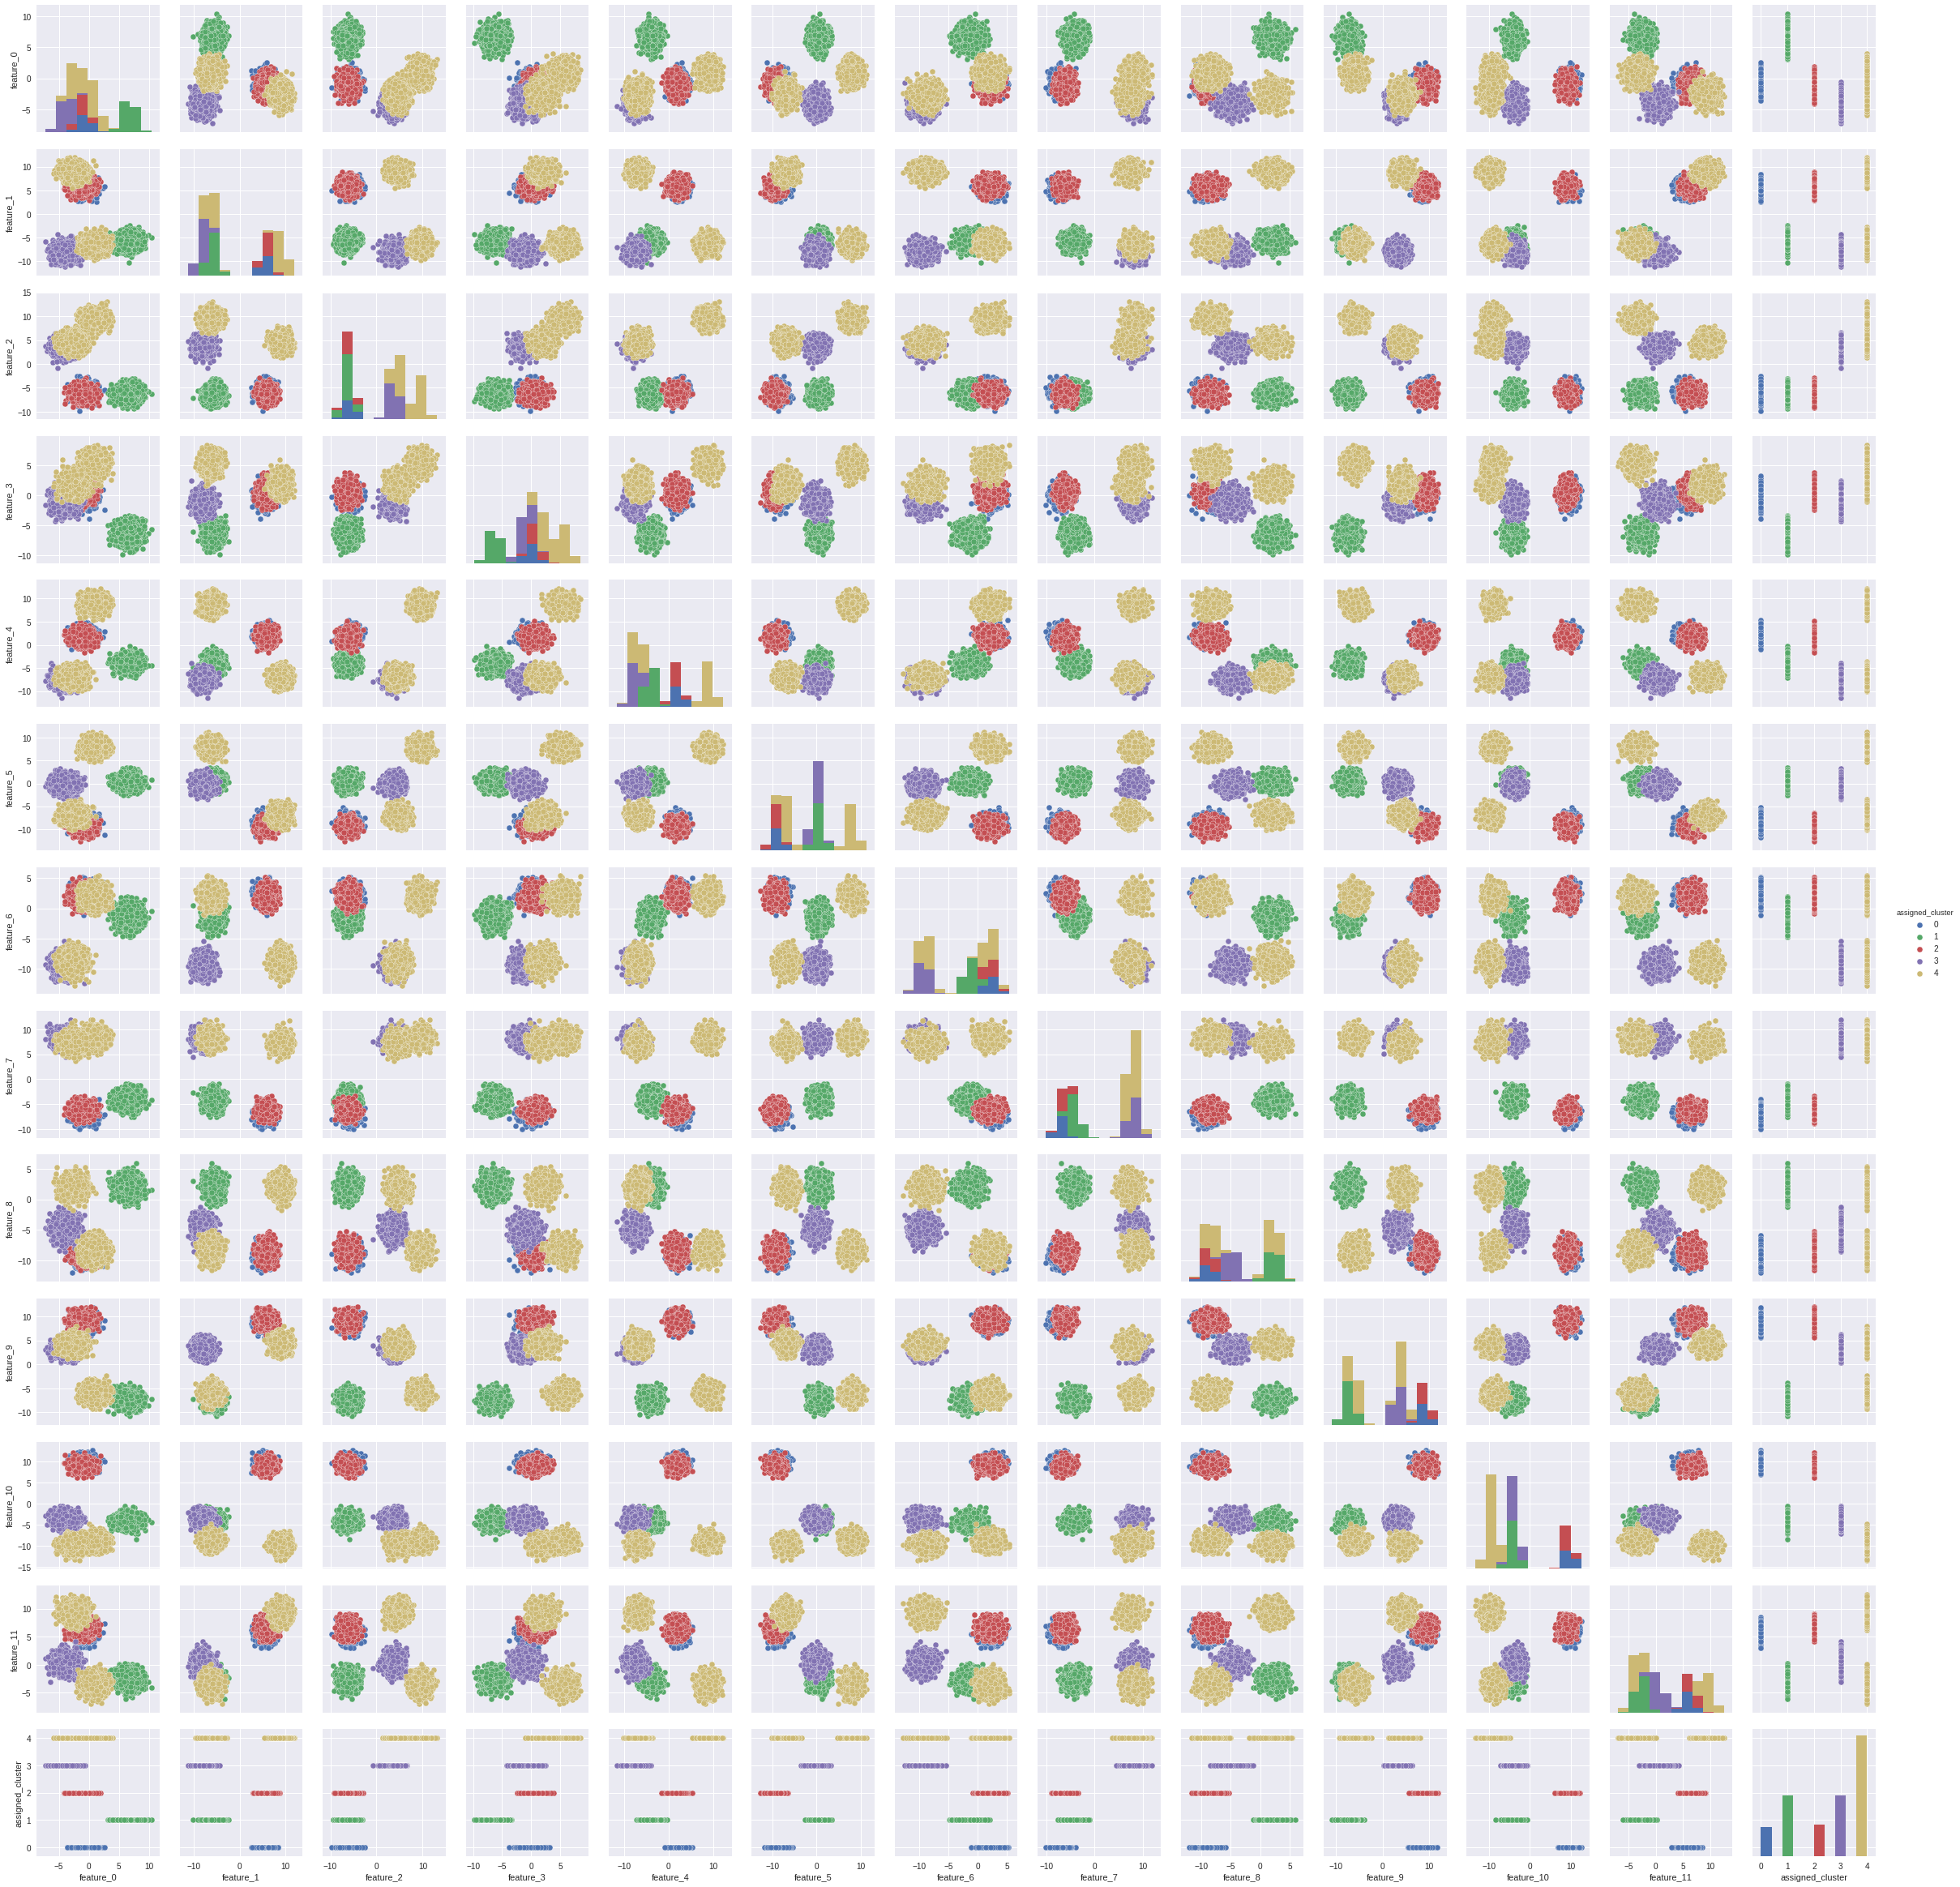

In [116]:
sns.pairplot(clustered_df, hue='assigned_cluster')

In [117]:
from sklearn.cluster import KMeans

In [118]:
sk_km = KMeans(n_clusters=5)

In [119]:
# %%timeit
sk_km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [120]:
sklearn_df = pd.DataFrame(X, columns=feature_names)
sklearn_df['assigned_cluster'] = sk_km.labels_

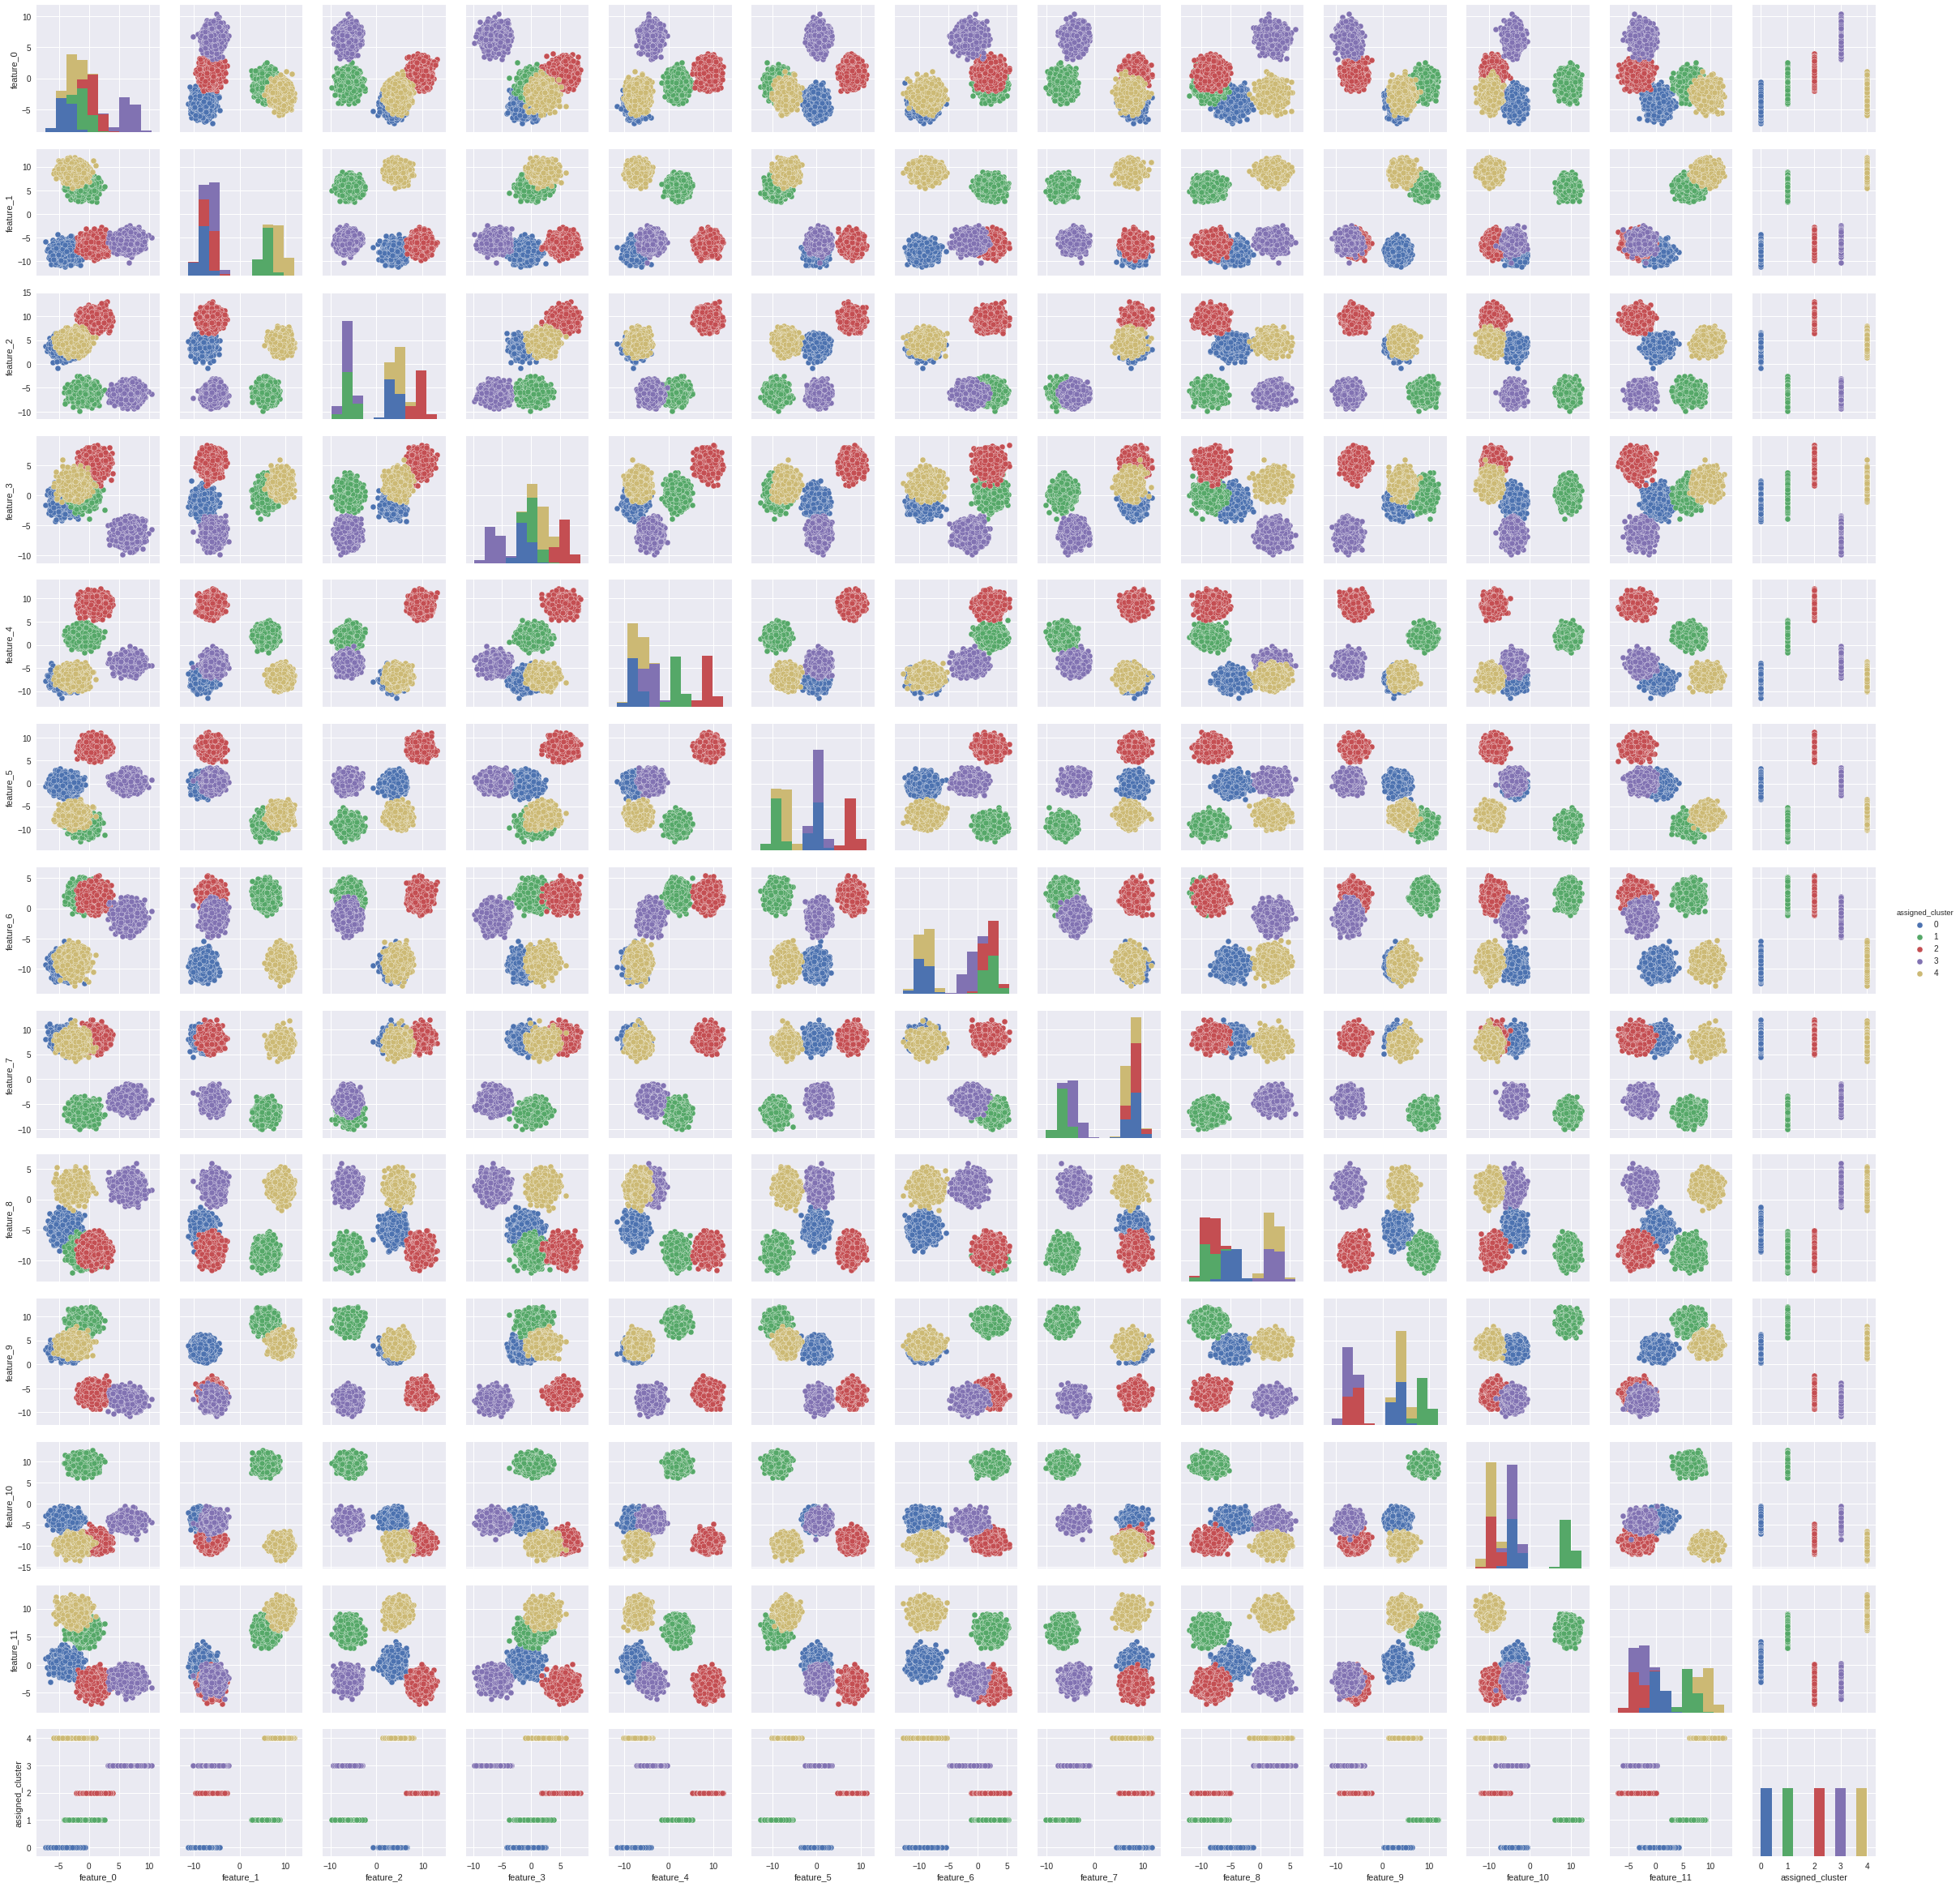

In [121]:
sns.pairplot(sklearn_df, hue='assigned_cluster')